# Insurance Claims Data Investigation

### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [3]:
df = pd.read_csv("Cleaned_Insurance_Data.csv")

### Exploratory Data Analysis

In [4]:
df.head() # Display top 5 rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
df.shape

(1000, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can see that 18 features are of a numerical datatype while the remaining 21 features consist of text data values. 

We will now have a look at the summary statistics for all features of numerical datatypes.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.500,276.250,479.00
age,1000.0,3.896300e+01,9.126276e+00,19.00,32.0000,38.000,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.000,759099.750,999435.00
policy_deductable,1000.0,1.134000e+03,6.106692e+02,500.00,500.0000,1000.000,2000.000,2000.00
policy_annual_premium,1000.0,1.257020e+03,2.439092e+02,433.33,1090.5675,1258.415,1415.695,2047.59
umbrella_limit,1000.0,1.103100e+06,2.296444e+06,0.00,0.0000,0.000,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.500,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.000,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.000,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.000,17.000,23.00


**Detecting Null Values**

In [8]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

It seems there is only one feature that contains null values, that feature being `authorities_contacted`.

This is due to the value of "None" being detected as a null value and thus being replaced by "nan" upon reading the dataset into a pandas dataframe. We can view this feature in closer detail as follows:

In [9]:
df["authorities_contacted"].unique() # Displaying all unique values for the authorities_contacted feature

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

We will replace all "nan" values in this feature with the string "None" as it was a valid option considering the context of the feature. 

In [10]:
df["authorities_contacted"] = df["authorities_contacted"].fillna("None")

In [11]:
df["authorities_contacted"].unique() # Ensure correct replacement of nan values

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [12]:
df["authorities_contacted"].isnull().sum() # Ensure null values have been dealt with

0

**Search for anomalous values**

In [13]:
for col in df.columns:
    
    if "?" in df[col].values:
        print(col)

collision_type
property_damage
police_report_available


In [14]:
df["collision_type"].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [15]:
df["property_damage"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [16]:
df["police_report_available"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [17]:
df["collision_type"] = df["collision_type"].replace("?", "Unknown")

In [18]:
df["collision_type"].unique()

array(['Side Collision', 'Unknown', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [19]:
df["property_damage"] = df["property_damage"].replace("?", "Unknown")

In [20]:
df["police_report_available"] = df["police_report_available"].replace("?", "Unknown")

In [21]:
df["property_damage"].unique()

array(['YES', 'Unknown', 'NO'], dtype=object)

In [22]:
df["police_report_available"].unique()

array(['YES', 'Unknown', 'NO'], dtype=object)

**Number of Observations**

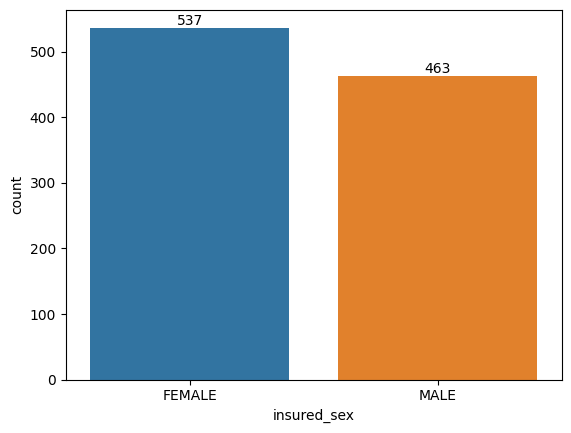

In [23]:
ax = sns.countplot(x=df["insured_sex"], order = df["insured_sex"].value_counts().index)

abs_values = df['insured_sex'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.show()

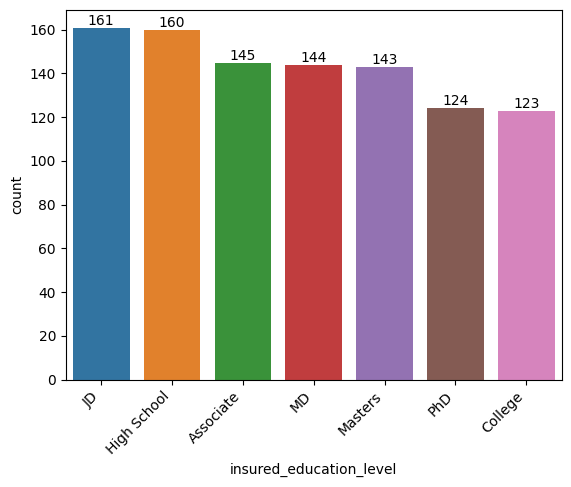

In [24]:
ax = sns.countplot(x=df["insured_education_level"], order=df["insured_education_level"].value_counts().index)

abs_values = df['insured_education_level'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

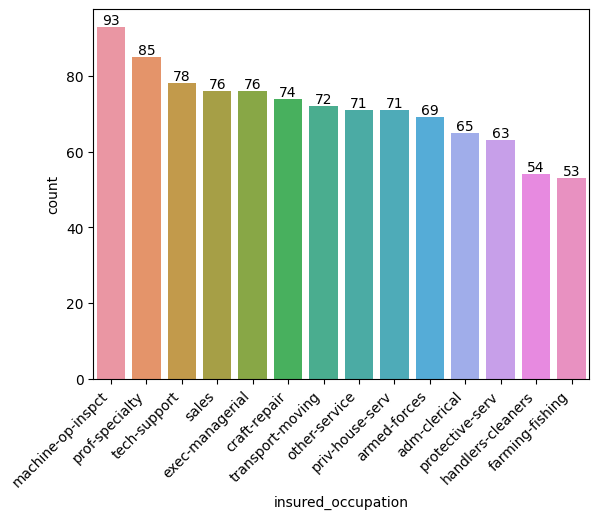

In [25]:
ax = sns.countplot(x=df["insured_occupation"], order=df["insured_occupation"].value_counts().index)

#for p, label in zip(ax.patches, df["insured_occupation"].value_counts()):
#    ax.annotate(label, (p.get_x()+0.19, p.get_height()+1.5))

abs_values = df['insured_occupation'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

In [26]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

**Total Claim Amount**

In [27]:
df_sex_group = df.groupby("insured_sex").sum().reset_index()
df_sex_group

,insured_sex,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,FEMALE,106028,20596,292745417,2000-09-061990-05-252006-10-121997-02-052002-0...,OHILOHILOHOHOHOHINOHINILOHILILILILINILOHILININ...,100/300250/500250/500100/300100/300100/300100/...,612000,670231.26,579000000,...,775,NONONOYESUnknownYESNOYESNONONOUnknownYESNONOYE...,28645360,3989500,4009320,20646540,DodgeChevroletSaabToyotaFordAudiToyotaDodgeAcc...,RAMTahoe95CamryF150A3HighlanderNeonMDXTLPathfi...,1076825,NYYNNNNYYNNNNNNYNNNNNNNNNNNNNYYNYYNNNNNNYNNNNY...
1,MALE,97926,18367,253493231,2014-10-172006-06-272014-06-062000-06-041990-0...,OHINILINILILOHOHININILININOHININILILILILOHINIL...,250/500250/500500/1000250/500100/300100/300500...,522000,586788.85,524100000,...,712,YESUnknownNOUnknownYESUnknownNOYESYESUnknownYE...,24116580,3443920,3390250,17282410,SaabMercedesAccuraNissanAudiSaabSaabNissanSubu...,92xE400RSXPathfinderA592x95MaximaLegacyImpreza...,928278,YYNNNNNNNNYYNYNYNYNNYYNYNYNNNNNYNNYYNNNNNNYNNY...


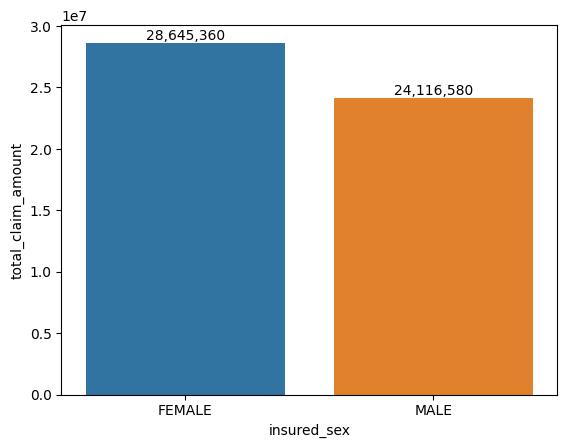

In [28]:
ax = sns.barplot(data=df_sex_group, x="insured_sex", y="total_claim_amount", errorbar=None)

abs_values = df_sex_group['total_claim_amount'].values

#ax.bar_label(container=ax.containers[0], labels=abs_values)

for label in ax.containers:
    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

#labels=[f'{x:,.0f}' for x in label.datavalues]

In [29]:
df_edu_group = df.groupby("insured_education_level").sum().reset_index()
df_edu_group

,insured_education_level,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,Associate,31543,5776,78669278,2014-06-061990-02-032005-11-272003-08-011995-0...,ILILILILILININOHOHOHILILILINOHOHOHOHOHOHINOHIL...,500/1000100/300500/1000500/1000100/300250/5001...,167000,181987.37,160100000,...,231,NOYESUnknownNOUnknownUnknownUnknownNOUnknownNO...,7091630,932510,968460,5190660,AccuraAudiAccuraBMWBMWBMWHondaBMWAudiChevrolet...,RSXA5RSX3 SeriesM5X5CivicX6A3MalibuX6F150Accor...,290717,NNNNNYNNYNNNYYNYNNYYNYNNNNNNYNNYYNYNNNNNYNNNNY...
1,College,23702,4759,73656420,2000-06-041998-12-282005-06-081996-02-022006-0...,INOHOHINILOHININOHINILINOHILINILOHILOHOHOHINIL...,250/500250/500500/1000100/300500/1000500/10001...,139500,154227.63,143000000,...,172,UnknownYESYESNONONOYESYESYESUnknownYESUnknownY...,6420060,913230,900660,4606170,NissanDodgeNissanFordDodgeAudiToyotaMercedesSu...,PathfinderNeonMaximaEscapeRAMA3CorollaC300Lega...,246591,NYNNNYNNNNNYNNNNNNNNYYNNYNYNYNYNNNNNNNYNNYNYYN...
2,High School,31373,6104,85428422,1999-05-292004-11-151992-08-021994-05-271990-0...,OHININILINILOHILINOHOHINOHOHILINILOHILINILILIL...,100/300500/1000500/1000100/300100/300100/30010...,174500,206026.56,179000000,...,212,YESYESNOYESYESUnknownYESYESNONONOYESUnknownUnk...,8356090,1169840,1198630,5987620,AudiSuburuNissanSuburuToyotaSuburuMercedesBMWA...,A3LegacyPathfinderForrestorCamryImprezaC300M5A...,320760,NNNYNNYNYNNNNNNNNYNNNNNYNNYYNNNNNNNNNNNNNNNNYN...
3,JD,31078,6119,84717540,2002-06-252002-07-181990-02-082008-06-191993-0...,ININOHILILINILILINILOHOHILILININILOHOHINOHOHOH...,250/500100/300100/300100/300500/1000250/500100...,175000,201070.06,187000000,...,239,UnknownUnknownYESUnknownYESNOUnknownUnknownUnk...,8290010,1224950,1152070,5912990,SuburuSuburuDodgeFordSuburuNissanToyotaBMWSubu...,ImprezaForrestorNeonF150LegacyPathfinderHighla...,322933,NYNYNYNNNNYNNNNNNYNNNYYNNNNNYNYNNNYYYNNYNNYNYN...
4,MD,31762,5807,81049056,2014-10-172006-06-271997-11-202012-10-261992-1...,OHINOHOHINOHININILOHOHINOHINOHILINININILILILIN...,250/500250/500500/1000100/300100/300500/100010...,175000,182114.08,177000000,...,210,YESUnknownNONONONOUnknownUnknownUnknownYESNONO...,7962750,1139700,1151870,5671180,SaabMercedesSaabToyotaAccuraAccuraDodgeJeepAcc...,92xE40095HighlanderMDXTLRAMWranglerMDXPathfind...,288568,YYNNYNYNNNNYNNYNNNYYNNYNNNNNNNNYNYYNNNYNYNNYNN...
5,Masters,29650,5562,79742348,2002-05-262013-12-052000-02-182003-03-091997-0...,OHOHILILILINOHILINILINILILINOHOHILILILOHOHINOH...,100/300100/300250/500100/300100/300500/1000500...,159000,175674.95,133000000,...,239,UnknownYESUnknownYESUnknownNOUnknownNONOYESYES...,7788400,1087480,1093520,5607400,FordFordToyotaSuburuMercedesChevroletAccuraNis...,F150EscapeCorollaForrestorC300SilveradoTLMaxim...,286801,NYNYNNNNYYYYYNNNNYNNYNYNNNNNNNNNNNNNNNNNNNNNNN...
6,PhD,24846,4836,62975584,2000-09-061990-05-252006-10-121997-02-052011-0...,OHILOHILILILILOHINOHOHINILINOHOHILILILINILILOH...,100/300250/500250/500100/300100/300500/1000500...,144000,155919.46,124000000,...,184,NONONOYESUnknownNOYESNOYESYESNOUnknownNOUnknow...,6853000,965710,934360,4952930,DodgeChevroletSaabToyotaSaabAccuraAudiMercedes...,RAMTahoe95Camry92xTLA3E400PassatF150SilveradoC...,248733,NYYNNNNNNNNNNYYYNNYYNNNNNYNNNNNNNYYYYYNYYYNNYY...


<Axes: xlabel='insured_education_level', ylabel='total_claim_amount'>

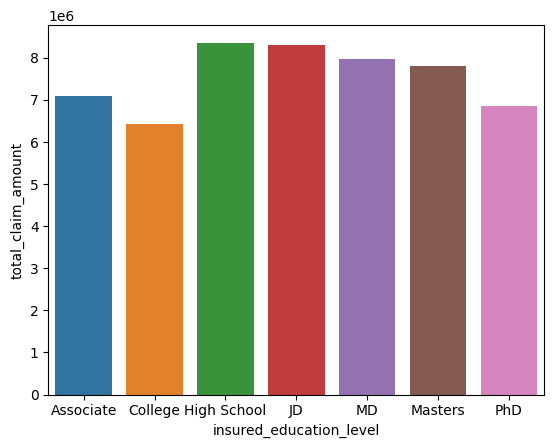

In [30]:
sns.barplot(data=df_edu_group, x="insured_education_level", y="total_claim_amount", errorbar=None)

#abs_values = df_edu_group['total_claim_amount'].values
#abs_values
#ax.bar_label(container=ax.containers[0], labels=abs_values)

#for label in ax.containers:
#    ax.bar_label(label, labels=[f'{x:,.0f}' for x in label.datavalues])

In [32]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

### Feature Engineering

In [77]:
df_eng = df.copy()

**Date Features**

In [78]:
df_eng["policy_bind_date"] = pd.to_datetime(df_eng["policy_bind_date"])

In [79]:
df_eng["policy_bind_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: policy_bind_date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [80]:
df_eng['policy_bind_year'] = df_eng['policy_bind_date'].dt.year
df_eng['policy_bind_month'] = df_eng['policy_bind_date'].dt.month
df_eng['policy_bind_day'] = df_eng['policy_bind_date'].dt.day

In [81]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,2014,10,17
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,2006,6,27


In [82]:
df_eng["incident_date"] = pd.to_datetime(df_eng["incident_date"])

In [83]:
df_eng["incident_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: incident_date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [84]:
df_eng['incident_year'] = df_eng['incident_date'].dt.year
df_eng['incident_month'] = df_eng['incident_date'].dt.month
df_eng['incident_day'] = df_eng['incident_date'].dt.day

In [85]:
df_eng[['incident_date', 'incident_year', 'incident_month', 'incident_day']].head(2)

,incident_date,incident_year,incident_month,incident_day
0,2015-01-25,2015,1,25
1,2015-01-21,2015,1,21


**Years as Customer**

In [86]:
df_eng["years_as_customer"] = df_eng["months_as_customer"]/12

In [87]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,92x,2004,Y,2014,10,17,2015,1,25,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,E400,2007,Y,2006,6,27,2015,1,21,19.000000


**Customer Category**

In [88]:
def categorise_customer(customer_term):
    if customer_term < 5:
        return 'Short-term Client'
    elif 5 <= customer_term < 15:
        return 'Established Client'
    else:
        return 'Long-term Client'

In [89]:
df_eng['customer_category'] = df_eng['years_as_customer'].apply(categorise_customer)

In [90]:
df_eng.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2004,Y,2014,10,17,2015,1,25,27.333333,Long-term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2007,Y,2006,6,27,2015,1,21,19.000000,Long-term Client
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,2007,N,2000,9,6,2015,2,22,11.166667,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2014,Y,1990,5,25,2015,1,10,21.333333,Long-term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,2009,N,2014,6,6,2015,2,17,19.000000,Long-term Client


**Age Category**

In [91]:
def categorise_age(age):
    if age < 30:
        return 'Young Adult'
    elif 30 <= age < 60:
        return 'Middle Aged'
    else:
        return 'Elderly'

In [92]:
df_eng['age_category'] = df_eng['age'].apply(categorise_age)

In [ ]:
df_eng.head(2)

**Policy Monthly Premium**

In [93]:
df_eng['policy_monthly_premium'] = df_eng['policy_annual_premium']/12

In [94]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,customer_category,age_category,policy_monthly_premium
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2014,10,17,2015,1,25,27.333333,Long-term Client,Middle Aged,117.242500
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,2006,6,27,2015,1,21,19.000000,Long-term Client,Middle Aged,99.768333


**Total Premiums Paid**

In [95]:
df_eng['total_premiums_paid'] = df_eng['policy_monthly_premium'] * df_eng['months_as_customer']

In [96]:
df_eng.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,customer_category,age_category,policy_monthly_premium,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,10,17,2015,1,25,27.333333,Long-term Client,Middle Aged,117.242500,38455.54
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,6,27,2015,1,21,19.000000,Long-term Client,Middle Aged,99.768333,22747.18


**Net Value of Customer**

In [97]:
df_eng['net_value_of_customer'] = df_eng['total_premiums_paid'] - df_eng['total_claim_amount']

In [98]:
df_eng.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_bind_day,incident_year,incident_month,incident_day,years_as_customer,customer_category,age_category,policy_monthly_premium,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,17,2015,1,25,27.333333,Long-term Client,Middle Aged,117.242500,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,27,2015,1,21,19.000000,Long-term Client,Middle Aged,99.768333,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,6,2015,2,22,11.166667,Established Client,Young Adult,117.761667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,25,2015,1,10,21.333333,Long-term Client,Middle Aged,117.978333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6,2015,2,17,19.000000,Long-term Client,Middle Aged,131.992500,30094.290000,23594.290000


In [99]:
df_eng.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'incident_year',
       'incident_month', 'incident_day', 'years_as_customer',
       'customer_category', 'age_

In [100]:
df_eng.head(5).T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17 00:00:00,2006-06-27 00:00:00,2000-09-06 00:00:00,1990-05-25 00:00:00,2014-06-06 00:00:00
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


### Export Engineered Dataset

In [101]:
df_eng.to_csv('Advanced_Features_Insurance_Data.csv')